In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords

In [2]:
# Для Pandas 1.3.0 и выше
df1 = pd.read_csv("word2lemma.dat",sep="\t", on_bad_lines='skip')

In [3]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [4]:
df["no punct"] = df["Unnamed: 4"]

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,no punct
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,NaN


In [6]:
df1.head(5)

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ,0
0,' пр. ',прочий,ПРИЛАГАТЕЛЬНОЕ,0
1,100%,100%,НАРЕЧИЕ,0
2,2хдневная,2хдневный,ПРИЛАГАТЕЛЬНОЕ,0
3,2хдневного,2хдневный,ПРИЛАГАТЕЛЬНОЕ,0
4,2хдневное,2хдневный,ПРИЛАГАТЕЛЬНОЕ,0


In [7]:
df1.shape

(2760405, 4)

In [8]:
wn = nltk.WordNetLemmatizer()
english_stopwords = stopwords.words("english")
russian_stopword = stopwords.words("russian")

In [9]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return "".join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text)

st = '>\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])
    
def lemmatenizing(text):
    return [wn.lemmatize(word) for word in text]

def tokenized(text):
    return re.split('\W+', text)

def remove_stopwords(tokens, stopwords):
    return [token for token in tokens if token.lower() not in stopwords]

<>:18: SyntaxWarning: invalid escape sequence '\W'
<>:18: SyntaxWarning: invalid escape sequence '\W'
C:\Users\я\AppData\Local\Temp\ipykernel_13072\2121694840.py:18: SyntaxWarning: invalid escape sequence '\W'
  return re.split('\W+', text)


In [10]:
df.columns = ["alfamodik", "HiddenBagulua", "no numbers", "no space", "no other sumbols", "no punct"]

In [11]:
df["no numbers"] = df.HiddenBagulua.apply(lambda x: remove_numbers(x.lower()))
df["no space"] = df["no numbers"].apply(lambda x: remove_multiple_spaces(x.lower()))
df["no other sumbols"] = df["no space"].apply(lambda x: remove_othersymbol(x.lower()))
df["no punct"] = df["no other sumbols"].apply(lambda x: remove_punctuation(x.lower()))
df["no punct"] = df["no punct"].apply(lambda x: tokenized(x))
df["no punct"] = df["no punct"].apply(lambda x: remove_stopwords(x, english_stopwords))
df["no punct"] = df["no punct"].apply(lambda x: lemmatenizing(x))

In [12]:
df1["другой"] = df1.другой.apply(lambda x: remove_numbers(x.lower()))
df1["другой"] = df1["другой"].apply(lambda x: remove_multiple_spaces(x.lower()))
df1["другой"] = df1["другой"].apply(lambda x: remove_othersymbol(x.lower()))
df1["другой"] = df1["другой"].apply(lambda x: remove_punctuation(x.lower()))
df1["другой"] = df1["другой"].apply(lambda x: tokenized(x))
df1["другой"] = df1["другой"].apply(lambda x: remove_stopwords(x, russian_stopword))
df1["другой"] = df1["другой"].apply(lambda x: lemmatenizing(x))

In [13]:
df.head()

,alfamodik,HiddenBagulua,no numbers,no space,no other sumbols,no punct
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni, ]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup fina...,free entry in a wkly comp to win fa cup final ...,free entry in a wkly comp to win fa cup final ...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say, ]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...","[nah, think, go, usf, life, around, though]"


In [14]:
df["no punct"].head()

0    [go, jurong, point, crazy, available, bugis, n...
1                     [ok, lar, joking, wif, u, oni, ]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3      [u, dun, say, early, hor, u, c, already, say, ]
4          [nah, think, go, usf, life, around, though]
Name: no punct, dtype: object

In [15]:
df1.sample(10)

,' др. ',другой,ПРИЛАГАТЕЛЬНОЕ,0
1608032,перевидаю,[перевидать],ГЛАГОЛ,0
2524122,удостаиваете,[удостаивать],ГЛАГОЛ,0
887584,кипарисовое,[кипарисовый],ПРИЛАГАТЕЛЬНОЕ,0
1395177,обидчице,[обидчица],СУЩЕСТВИТЕЛЬНОЕ,0
661576,загеноцидил,[загеноцидить],ГЛАГОЛ,0
862975,кариогамиями,[кариогамия],СУЩЕСТВИТЕЛЬНОЕ,0
1186804,наигениальнейшая,[гениальный],ПРИЛАГАТЕЛЬНОЕ,0
2713389,эйхининам,[эйхинин],СУЩЕСТВИТЕЛЬНОЕ,0
2533313,укусим,[укусить],ГЛАГОЛ,0
2609702,фундирования,[фундирование],СУЩЕСТВИТЕЛЬНОЕ,0


In [16]:
from wordcloud import WordCloud

In [17]:
text = ' '.join(df["no punct"].astype(str).tolist())

In [18]:
text1 = ' '.join(df1["' др. '"].astype(str).tolist())

In [19]:
wrldcld = WordCloud(width=800, height=400, colormap="winter", background_color="white").generate(text1)

In [20]:
cloudword = WordCloud(width=800, height=400, colormap="winter", background_color="white").generate(text)

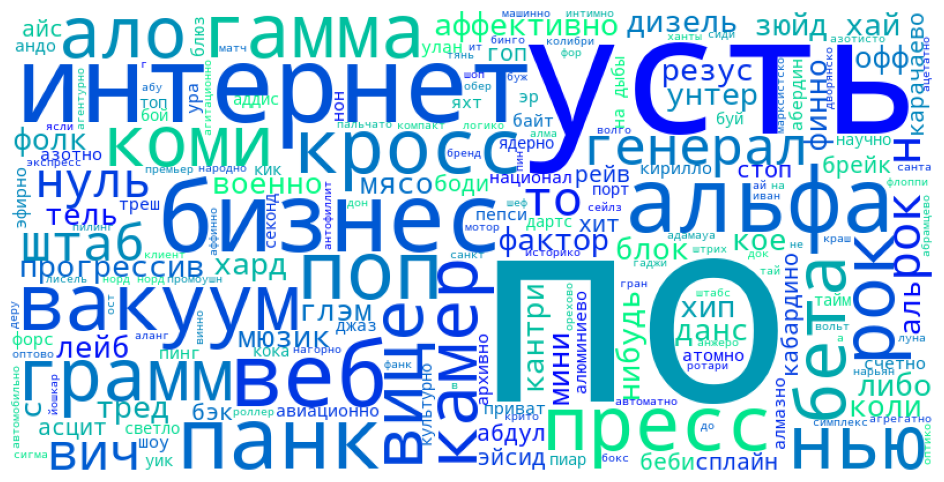

In [21]:
plt.figure(figsize=(12, 6))
plt.imshow(wrldcld, interpolation='hanning')
plt.axis('off')
plt.show()

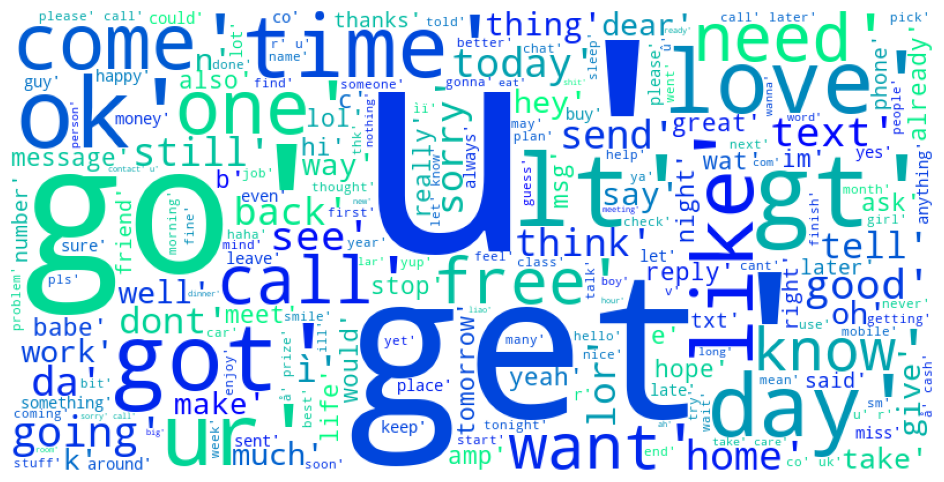

In [22]:
plt.figure(figsize=(12, 6))
plt.imshow(cloudword, interpolation='hanning')
plt.axis('off')
plt.show()

In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(df['no punct'].apply(lambda x: "".join([word + " " for word in x])));

In [25]:
tfidf_vectorizer = TfidfVectorizer(min_df=0.01, stop_words=english_stopwords, ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['no punct'].apply(lambda x: "".join([word + " " for word in x])))
tfidf_matrix.shape

(5572, 139)

In [26]:
tfidf_matrix

<5572x139 sparse matrix of type '<class 'numpy.float64'>'
	with 16400 stored elements in Compressed Sparse Row format>

In [27]:
print("Размер TF-IDF матрицы:", tfidf_matrix.shape)
print("\nСловарь (vocabulary_):")
print(tfidf_vectorizer.vocabulary_)
print("\nНазвания признаков (слова):")
print(tfidf_vectorizer.get_feature_names_out()) # Выводим названия признаков
print("\nПример TF-IDF матрицы (фрагмент):")
print(tfidf_matrix.toarray())

Размер TF-IDF матрицы: (5572, 139)

Словарь (vocabulary_):
{'go': 35, 'great': 40, 'got': 39, 'wat': 126, 'ok': 81, 'free': 31, 'win': 130, 'text': 111, 'txt': 119, 'say': 94, 'already': 0, 'think': 114, 'life': 56, 'around': 5, 'hey': 45, 'week': 128, 'word': 132, 'back': 8, 'like': 57, 'still': 106, 'send': 96, 'even': 26, 'per': 83, 'friend': 32, 'customer': 21, 'prize': 89, 'claim': 15, 'call': 11, 'mobile': 68, 'co': 16, 'gonna': 37, 'home': 47, 'soon': 104, 'want': 125, 'tonight': 118, 'today': 116, 'cash': 14, 'day': 23, 'reply': 91, 'urgent': 122, 'www': 135, 'right': 92, 'take': 109, 'help': 44, 'time': 115, 'next': 75, 'message': 65, 'com': 17, 'oh': 80, 'yes': 138, 'make': 63, 'way': 127, 'feel': 28, 'dont': 25, 'miss': 67, 'ur': 121, 'going': 36, 'first': 30, 'da': 22, 'lor': 59, 'meet': 64, 'really': 90, 'know': 51, 'lol': 58, 'always': 2, 'love': 60, 'amp': 3, 'let': 55, 'work': 133, 'wait': 123, 'sure': 108, 'yeah': 136, 'tell': 110, 'anything': 4, 'thanks': 112, 'uk': 1

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
df.drop(columns="no other sumbols", inplace=True)
df.drop(columns="HiddenBagulua", inplace=True)
df.drop(columns="no numbers", inplace=True)
df.drop(columns="no space", inplace=True)

In [30]:
from sklearn.cluster import KMeans
wgss = []

for i in range(1, 10):
    kmean = KMeans(n_clusters=i, init="k-means++", random_state=42, n_init=100)
    kmean.fit(tfidf_matrix)
    wgss.append(kmean.inertia_)

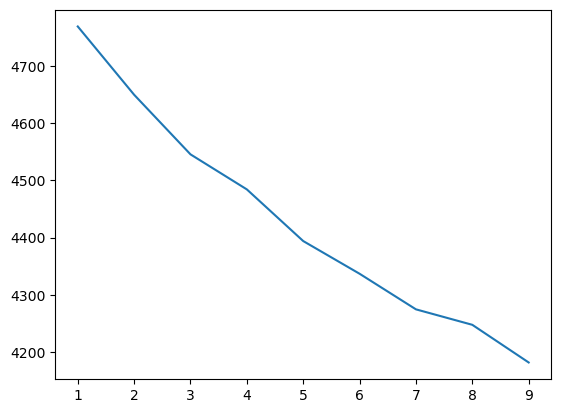

In [31]:
plt.plot(range(1, 10), wgss);
plt.show()

In [32]:
optimal_clusters = 7

In [33]:
kmeans = KMeans(n_clusters=optimal_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

In [34]:
df['cluster'] = clusters

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   alfamodik  5572 non-null   object
 1   no punct   5572 non-null   object
 2   cluster    5572 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 109.0+ KB


In [36]:
df.sample(5)

,alfamodik,no punct,cluster
4871,ham,"[hi, dis, yijue, would, happy, work, wif, ì, g...",5
1704,ham,"[might, accidant, tookplace, somewhere, ghodba...",5
21,ham,"[û, going, try, month, ha, ha, joking]",5
236,ham,"[ill, little, closer, like, bus, stop, street]",5
1199,ham,"[neft, transaction, reference, number, lt, gt,...",3


In [37]:
df.cluster.value_counts(ascending=True)

cluster
4     140
1     203
3     229
6     230
2     423
0     513
5    3834
Name: count, dtype: int64

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [39]:
X = tfidf_matrix
y = df.cluster

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.9102870813397129


In [45]:
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.97      0.83      0.89       163
           1       1.00      0.61      0.76        61
           2       0.95      0.57      0.72       134
           3       0.98      0.96      0.97        57
           4       1.00      0.80      0.89        41
           5       0.89      1.00      0.94      1152
           6       1.00      0.58      0.73        64

    accuracy                           0.91      1672
   macro avg       0.97      0.76      0.84      1672
weighted avg       0.92      0.91      0.90      1672



In [46]:
r2 = r2_score(y_test, y_pred)

In [47]:
r2

0.6714172354774386

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic_regression = LogisticRegression(random_state=42, solver='liblinear')

In [50]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [51]:
y_pred = logistic_regression.predict(X_test)

In [52]:
# 6. Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность логистической регрессии: {accuracy}")

Точность логистической регрессии: 0.9772727272727273


In [53]:
# Дополнительные метрики
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       163
           1       1.00      0.92      0.96        61
           2       0.98      0.89      0.93       134
           3       0.98      1.00      0.99        57
           4       1.00      0.90      0.95        41
           5       0.97      1.00      0.99      1152
           6       1.00      0.84      0.92        64

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [54]:
r2_score(y_test, y_pred)

0.9333901369791735

In [55]:
from sklearn.svm import SVC

In [56]:
svm = SVC(kernel='linear', random_state=42)
# 4. Обучение модели
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [57]:
y_pred = svm.predict(X_test)

In [58]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность SVM: {accuracy}")

# Дополнительные метрики
print("Отчет о классификации:\n", classification_report(y_test, y_pred))

Точность SVM: 0.9880382775119617
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       163
           1       0.98      0.98      0.98        61
           2       0.97      0.98      0.97       134
           3       0.97      1.00      0.98        57
           4       1.00      1.00      1.00        41
           5       1.00      0.99      0.99      1152
           6       0.94      1.00      0.97        64

    accuracy                           0.99      1672
   macro avg       0.97      0.99      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [59]:
r2_score(y_test, y_pred)

0.9549460984815401